# First practice

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
x_train.shape

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)
model.metrics_names

# Basic classification

In [25]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.5.0


In [55]:
# load fashion mnist 
fashion_mnist = keras.datasets.mnist # fashion_mnist.load_data() does not exist for r1.5
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [56]:
uniq, count = np.unique(train_labels,return_counts=True)
np.vstack((uniq,count)).T

array([[   0, 5923],
       [   1, 6742],
       [   2, 5958],
       [   3, 6131],
       [   4, 5842],
       [   5, 5421],
       [   6, 5918],
       [   7, 6265],
       [   8, 5851],
       [   9, 5949]])

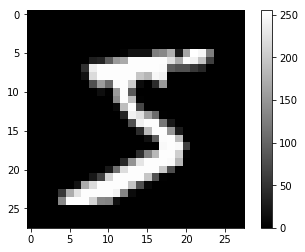

In [57]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.set_cmap('gray')
plt.grid(False)

In [58]:
train_images = train_images/255.0
test_images = test_images/255.0

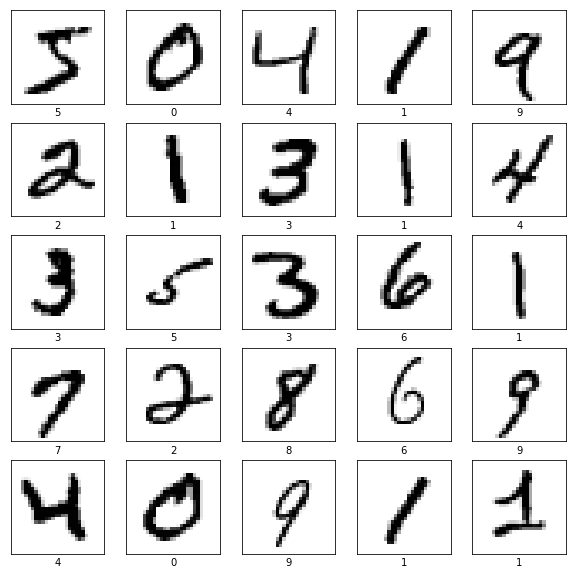

In [64]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [65]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================]60000/60000 [==============================] - 5s 84us/step - loss: 0.2612 - acc: 0.9254

Epoch 2/5
60000/60000 [==============================]60000/60000 [==============================] - 5s 84us/step - loss: 0.1158 - acc: 0.9655

Epoch 3/5
60000/60000 [==============================]60000/60000 [==============================] - 5s 83us/step - loss: 0.0792 - acc: 0.9761

Epoch 4/5
60000/60000 [==============================]60000/60000 [==============================] - 5s 85us/step - loss: 0.0600 - acc: 0.9816

Epoch 5/5
60000/60000 [==============================]60000/60000 [==============================] - 5s 82us/step - loss: 0.0448 - acc: 0.9862



In [68]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test acciracy:', test_acc)

10000/10000 [==============================]10000/10000 [==============================] - 0s 47us/step

Test acciracy: 0.976


In [69]:
predictions = model.predict(test_images)
predictions[0]

array([3.0982161e-08, 3.3068867e-10, 6.4999392e-07, 1.1914584e-04,
       2.3693948e-11, 2.7835404e-07, 7.6968484e-12, 9.9987388e-01,
       1.2740312e-06, 4.6847967e-06], dtype=float32)

In [70]:
np.argmax(predictions[0])

7

In [73]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label== true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                        100*np.max(predictions_array),
                                        true_label),
              color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

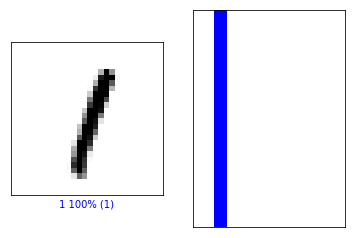

In [75]:
i = 5
plt.figure()
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

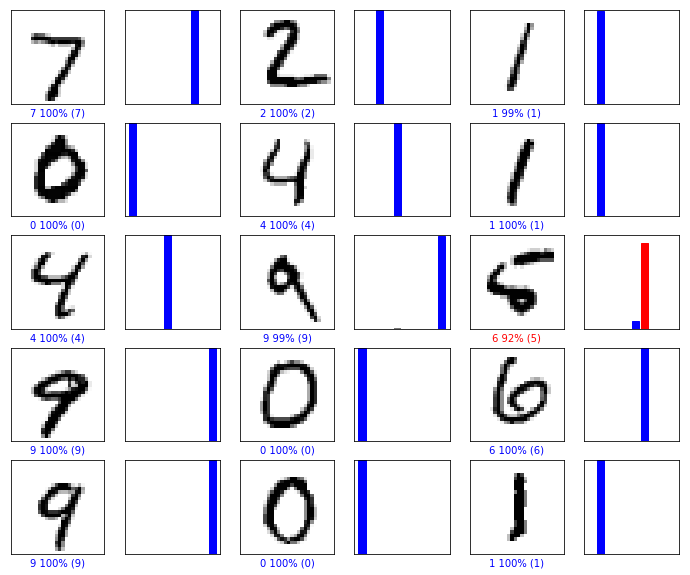

In [77]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

# Text classification with movie reviews

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

# get IMDB data
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

print(train_data[0])

AttributeError: module 'numpy' has no attribute 'arrange'

In [ ]:
# convert word index to string
word_index = imdb.get_word_index()

word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(txt):
    return ' '.join([reverse_word_index.get(i, '?') for i in txt])


decode_review(train_data[5])

In [ ]:
# padding to make all reviews the same length
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                       value=word_index["<PAD>"],
                                                       maxlen=256,
                                                       padding='post')
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       maxlen=256,
                                                       padding='post')

len(train_data[0]), len(test_data[0])

print(train_data[0])

In [ ]:
# build the model